In [ ]:
#First we import the required libraries
import pandas as pd
import string            #the class string is downloaded from nltk corpus
from nltk.corpus import stopwords

In [ ]:
#Get the spam data collection dataset which is tcsv,and the sep function takes it as a parameter.
#message is the text present in the dataset,while response is the label/category of the message.
df_spamcollection = pd.read_csv("Data\SpamCollection",sep = '\t',names=['response','message'])

In [ ]:
df_spamcollection.head()

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_spamcollection.describe()

,response,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df_spamcollection.groupby('response').describe()

message                                                            \
           count unique                                                top   
response                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
response       
ham        30  
spam        4

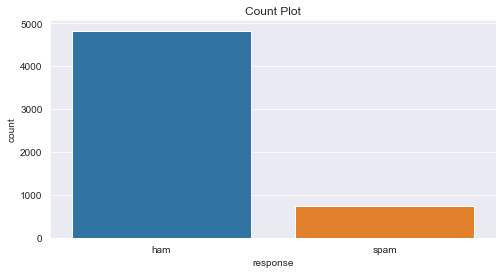

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize=(8,4)) # figsize which takes a tuple as an argument that contains the height and the width of the plot
sns.countplot(x='response', data=df_spamcollection)
plt.title('Count Plot')
plt.show()

In [ ]:
#verify length of the messages and add it as a new column(feature).the syntax on the LHS shows how to add new columns
#to a dataframe
df_spamcollection['length'] = df_spamcollection['message'].apply(len)

In [ ]:
#view first 5 messages with length
df_spamcollection.head()

,response,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### As we know any algorithm is good with numbers,we have to convert the text into numbers so that we can apply an algorithm to it. This process is called vectorization. Before vectorization we clean the text by removing stopwords and punctuation so that we get the important words or 'features'. This process is called tokenization.We need the nltk library to do this step.

In [ ]:
#importing the libraries
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokulnath.kandasamy\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
stopwords_nltk=stopwords.words('english')

In [ ]:
#stopwords_nltk

In [ ]:
def text_preprocess(text):

#1. Remove punctuation in the text
    #2. Remove stop words in the text
    #3. Return a list of words in the text
    #check characters to see if there are punctuation:
    no_punctuation = [i for i in text if i not in string.punctuation]
    #Now we will form the sentence with words having no punctuation
    no_punctuation = ''.join(no_punctuation)    #The join takes all the words without punctuation and join them into a single string.
    #Now eliminate any stopwords by looping through the no_punctuation object,and return all the words which
    #in lower case is not a part of the stopwords in english. Conversion to lower case is very much required,as 'he' and 'He'
    #can be treated as two different features
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [ ]:
df_spamcollection['message'].head().apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bag_of_words_transformer = CountVectorizer(analyzer=text_preprocess).fit(df_spamcollection['message'])

In [ ]:
print(len(bag_of_words_transformer.vocabulary_))

11425


In [ ]:
message_bagofwords = bag_of_words_transformer.transform(df_spamcollection['message'])

In [ ]:
message_bagofwords.shape

(5572, 11425)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf= TfidfTransformer().fit(message_bagofwords)

In [ ]:
message_tfidf= tfidf.transform(message_bagofwords)

In [ ]:
message_tfidf.shape

(5572, 11425)

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = df_spamcollection['message']
y= df_spamcollection['response']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
#Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer    # countvectorizer helps you get the features
from sklearn.feature_extraction.text import TfidfTransformer   #value each feature accordingly
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('vectorize', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('NBclassifier', MultinomialNB())
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vectorize',
                 CountVectorizer(analyzer=<function text_preprocess at 0x0000021E28787CA0>)),
                ('tfidf', TfidfTransformer()),
                ('NBclassifier', MultinomialNB())])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(f"""
Confusion Matrix:
{confusion_matrix(y_test, y_pred)}
Classification Report:
{classification_report(y_test, y_pred)}
""")


Confusion Matrix:
[[1207    0]
 [  45  141]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1207
        spam       1.00      0.76      0.86       186

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393


